In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

from multilabel_multiclass_classifier_net import MultiLabelMutliClassifierNet
from dataset_loader import Dataset_loader


In [2]:
# Load Dataset
flixstock_data = Dataset_loader()
(data_set, classes) = flixstock_data.custom_data_loader()
(train_x, test_x, 
 train_neck_y, test_neck_y,
 train_sleeves_y, test_sleeves_y, 
 train_pattern_y, test_pattern_y) = data_set

neck_lb, sleeves_lb, pattern_lb = classes
print('train data len:', train_x.shape[0], 'test data len:', test_x.shape[0])
print('neck_classes', len(neck_lb.classes_))
print('sleeve_classes', len(sleeves_lb.classes_))
print('pattern_classes', len(pattern_lb.classes_))

unique rows 3564
train data len: 2851 test data len: 713
neck_classes 8
sleeve_classes 5
pattern_classes 11


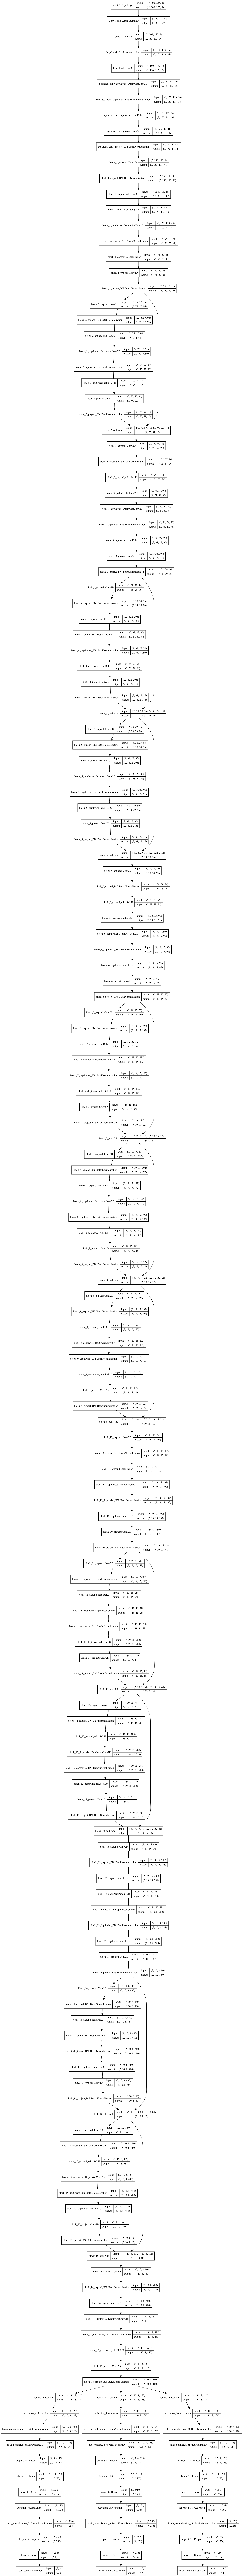

In [4]:
# Compile model
input_shape = (300, 225, 3)
net = MultiLabelMutliClassifierNet(input_shape, 
                 num_neck_classes=len(neck_lb.classes_), 
                 num_sleeves_classes=len(sleeves_lb.classes_), 
                 num_pattern_classes=len(pattern_lb.classes_))

# Define loss and loss weight (if any)
losses = {
    "pattern_output": "categorical_crossentropy",
    "sleeves_output": "categorical_crossentropy",
    "neck_output": "categorical_crossentropy"
}
lossWeights = {"neck_output": 1.0, "sleeves_output": 1.0, "pattern_output": 1.0}

EPOCHS = 50
INIT_LR = 1e-3

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

net.compile(losses=losses, lossWeights=lossWeights, opt=opt)

# Plot model
plot_model(net.model, show_shapes = True)

In [5]:
# Callback
CHECKPOINT="checkpoints_20-06/classification_epoch_{epoch:02d}_valloss_{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(CHECKPOINT, monitor='val_pattern_output_accuracy', verbose=1, save_weights_only=False , save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=2, min_lr=0.00001, verbose=1)
callbacks_list = [checkpoint, reduce_lr]

# Training parameters
train_x = train_x
train_y = {"neck_output": train_neck_y, "sleeves_output": train_sleeves_y, 'pattern_output':train_pattern_y}
val_x = test_x
val_y = {"neck_output": test_neck_y, "sleeves_output": test_sleeves_y, 'pattern_output':test_pattern_y}
epochs = EPOCHS
batch_size=32

In [6]:
# Train network
net.train(train_x,
          train_y,
          val_x,
          val_y,
          epochs,
          batch_size=batch_size,
          callbacks=callbacks_list)

Epoch 1/50
90/90 [==============================] - ETA: 0s - loss: 7.1987 - neck_output_loss: 2.5382 - sleeves_output_loss: 1.9995 - pattern_output_loss: 2.6610 - neck_output_accuracy: 0.2434 - sleeves_output_accuracy: 0.3297 - pattern_output_accuracy: 0.2673
Epoch 00001: val_loss improved from inf to 13.83619, saving model to checkpoints_20-06/classification_epoch_01_valloss_13.84.h5
90/90 [==============================] - 64s 713ms/step - loss: 7.1987 - neck_output_loss: 2.5382 - sleeves_output_loss: 1.9995 - pattern_output_loss: 2.6610 - neck_output_accuracy: 0.2434 - sleeves_output_accuracy: 0.3297 - pattern_output_accuracy: 0.2673 - val_loss: 13.8362 - val_neck_output_loss: 4.0087 - val_sleeves_output_loss: 4.0718 - val_pattern_output_loss: 5.7557 - val_neck_output_accuracy: 0.1052 - val_sleeves_output_accuracy: 0.1585 - val_pattern_output_accuracy: 0.0715
Epoch 2/50
90/90 [==============================] - ETA: 0s - loss: 4.6181 - neck_output_loss: 1.8092 - sleeves_output_loss:

Epoch 11/50
90/90 [==============================] - ETA: 0s - loss: 1.4968 - neck_output_loss: 0.6660 - sleeves_output_loss: 0.4152 - pattern_output_loss: 0.4157 - neck_output_accuracy: 0.7650 - sleeves_output_accuracy: 0.8460 - pattern_output_accuracy: 0.8464
Epoch 00011: val_loss improved from 3.10039 to 2.96308, saving model to checkpoints_20-06/classification_epoch_11_valloss_2.96.h5
90/90 [==============================] - 62s 689ms/step - loss: 1.4968 - neck_output_loss: 0.6660 - sleeves_output_loss: 0.4152 - pattern_output_loss: 0.4157 - neck_output_accuracy: 0.7650 - sleeves_output_accuracy: 0.8460 - pattern_output_accuracy: 0.8464 - val_loss: 2.9631 - val_neck_output_loss: 1.3145 - val_sleeves_output_loss: 0.8315 - val_pattern_output_loss: 0.8170 - val_neck_output_accuracy: 0.5568 - val_sleeves_output_accuracy: 0.6774 - val_pattern_output_accuracy: 0.7279
Epoch 12/50
90/90 [==============================] - ETA: 0s - loss: 1.4115 - neck_output_loss: 0.6157 - sleeves_output_lo

Epoch 21/50
90/90 [==============================] - ETA: 0s - loss: 0.8250 - neck_output_loss: 0.3740 - sleeves_output_loss: 0.2384 - pattern_output_loss: 0.2126 - neck_output_accuracy: 0.8776 - sleeves_output_accuracy: 0.9218 - pattern_output_accuracy: 0.9344
Epoch 00021: val_loss did not improve from 2.96308

Epoch 00021: ReduceLROnPlateau reducing learning rate to 1e-05.
90/90 [==============================] - 56s 622ms/step - loss: 0.8250 - neck_output_loss: 0.3740 - sleeves_output_loss: 0.2384 - pattern_output_loss: 0.2126 - neck_output_accuracy: 0.8776 - sleeves_output_accuracy: 0.9218 - pattern_output_accuracy: 0.9344 - val_loss: 2.9943 - val_neck_output_loss: 1.3105 - val_sleeves_output_loss: 0.8368 - val_pattern_output_loss: 0.8470 - val_neck_output_accuracy: 0.5722 - val_sleeves_output_accuracy: 0.6985 - val_pattern_output_accuracy: 0.7349
Epoch 22/50
90/90 [==============================] - ETA: 0s - loss: 0.8141 - neck_output_loss: 0.3645 - sleeves_output_loss: 0.2445 - p

90/90 [==============================] - ETA: 0s - loss: 0.6667 - neck_output_loss: 0.3129 - sleeves_output_loss: 0.1948 - pattern_output_loss: 0.1590 - neck_output_accuracy: 0.9039 - sleeves_output_accuracy: 0.9397 - pattern_output_accuracy: 0.9590
Epoch 00041: val_loss did not improve from 2.96308
90/90 [==============================] - 67s 740ms/step - loss: 0.6667 - neck_output_loss: 0.3129 - sleeves_output_loss: 0.1948 - pattern_output_loss: 0.1590 - neck_output_accuracy: 0.9039 - sleeves_output_accuracy: 0.9397 - pattern_output_accuracy: 0.9590 - val_loss: 3.0109 - val_neck_output_loss: 1.3221 - val_sleeves_output_loss: 0.8484 - val_pattern_output_loss: 0.8404 - val_neck_output_accuracy: 0.5680 - val_sleeves_output_accuracy: 0.7097 - val_pattern_output_accuracy: 0.7377
Epoch 42/50
90/90 [==============================] - ETA: 0s - loss: 0.6991 - neck_output_loss: 0.3261 - sleeves_output_loss: 0.1969 - pattern_output_loss: 0.1762 - neck_output_accuracy: 0.9056 - sleeves_output_ac

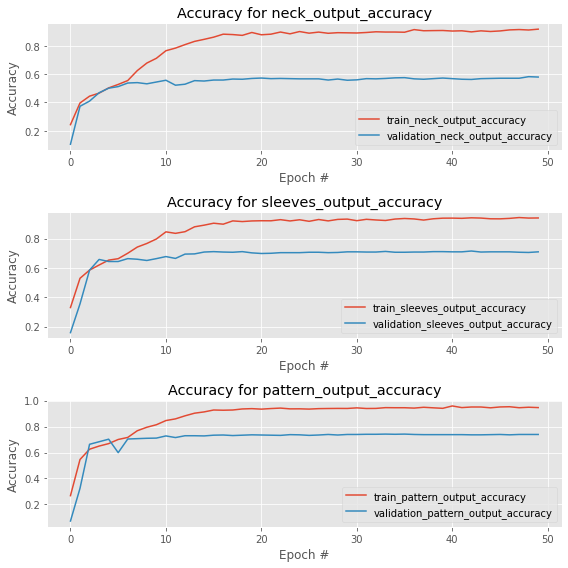

In [7]:
%matplotlib inline
accuracyNames = ["neck_output_accuracy", "sleeves_output_accuracy", "pattern_output_accuracy"]
plt.style.use("ggplot")
(fig, ax) = plt.subplots(3, 1, figsize=(8, 8))
# loop over the accuracy names
for (i, l) in enumerate(accuracyNames):
	# plot the loss for both the training and validation data
	ax[i].set_title("Accuracy for {}".format(l))
	ax[i].set_xlabel("Epoch #")
	ax[i].set_ylabel("Accuracy")
	ax[i].plot(np.arange(0, EPOCHS), net.training_history.history[l], label='train_'+l)
	ax[i].plot(np.arange(0, EPOCHS), net.training_history.history["val_" + l],
		label="validation_" + l)
	ax[i].legend()
# save the accuracies figure
plt.tight_layout()